In [56]:
#https://www.tensorflow.org/tutorials/keras/classification
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

!pip list

Package                            Version  
---------------------------------- ---------
absl-py                            0.9.0    
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
appnope                            0.1.0    
appscript                          1.0.1    
asn1crypto                         1.0.1    
astor                              0.8.1    
astroid                            2.3.1    
astropy                            3.2.2    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifuls

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255

4423680/4422102 [==============================] - 0s 0us/step


In [15]:
#Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:
train_images.shape
#Likewise, there are 60,000 labels in the training set:
#len(train_labels)

#10,000 images in test set with 10,000 labels
#test_images.shape
#len(test_labels)

(60000, 28, 28)

In [12]:
print(set(train_labels))
#Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:
#label 0=T-shirt/top, 1=Trouser, etc.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


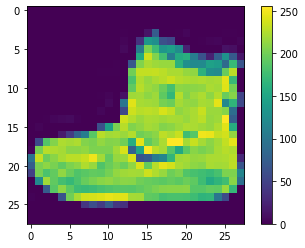

In [27]:
plt.figure()
plt.imshow(train_images[0]) #inspecting the firsth (0th) image in training set
plt.colorbar() #pixel values fall in range between 0-255
plt.grid(False) #T or F to show gridlines
plt.show()
plt.show()

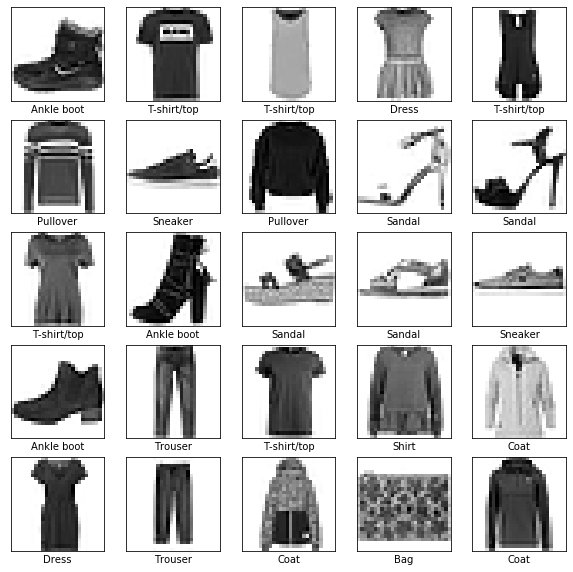

In [33]:
#To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #transform 2D array to 1D array
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [37]:
#Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [40]:
#save the model at this location after every epoch
checkpoint_path = '/Users/benjamin.jones/Desktop/Fashion Classifier/cp-{epoch:04d}' #unique name for each saved checkpoint (after every 1 epoch)
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_freq='epoch' #save after every epoch
                                                )
latest = tf.train.latest_checkpoint(checkpoint_dir) #returns file name of latest checkpoint
print(latest)

None


In [11]:
#Optional: loading a saved model
model.load_weights(latest) #loads weights of the most reccent saved model (adjust if latest not desired)

In [48]:
#begin or resume training
EPOCHS=10

history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels),
    callbacks=[cp_callback]
    )


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.8583
Epoch 00001: saving model to /Users/benjamin.jones/Desktop/Fashion Classifier/cp-0001
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4369 - accuracy: 0.8583 - val_loss: 0.6092 - val_accuracy: 0.8290
Epoch 2/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.4408 - accuracy: 0.8555
Epoch 00002: saving model to /Users/benjamin.jones/Desktop/Fashion Classifier/cp-0002
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4403 - accuracy: 0.8557 - val_loss: 0.6016 - val_accuracy: 0.8209
Epoch 3/10
58848/60000 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.8569
Epoch 00003: saving model to /Users/benjamin.jones/Desktop/Fashion Classifier/cp-0003
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4415 - accuracy: 0.8571 - val_loss: 0.5769 -

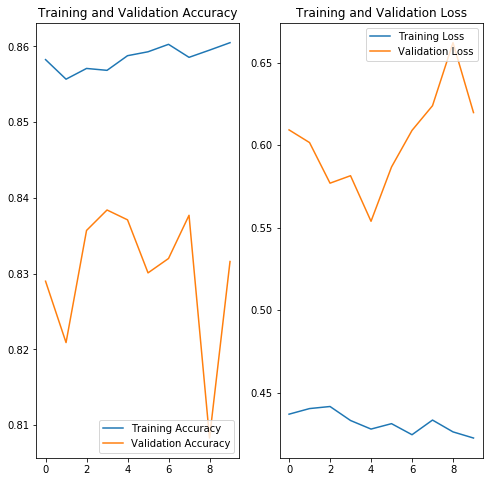

In [51]:
#optional, visual analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
#predict

probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
predictions[0] #look at example prediction
np.argmax(predictions[0]) #takes the value of highest prediction
test_labels[0] #what was the correct answer

9

In [60]:
#graph functions to look at full set of 10 predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

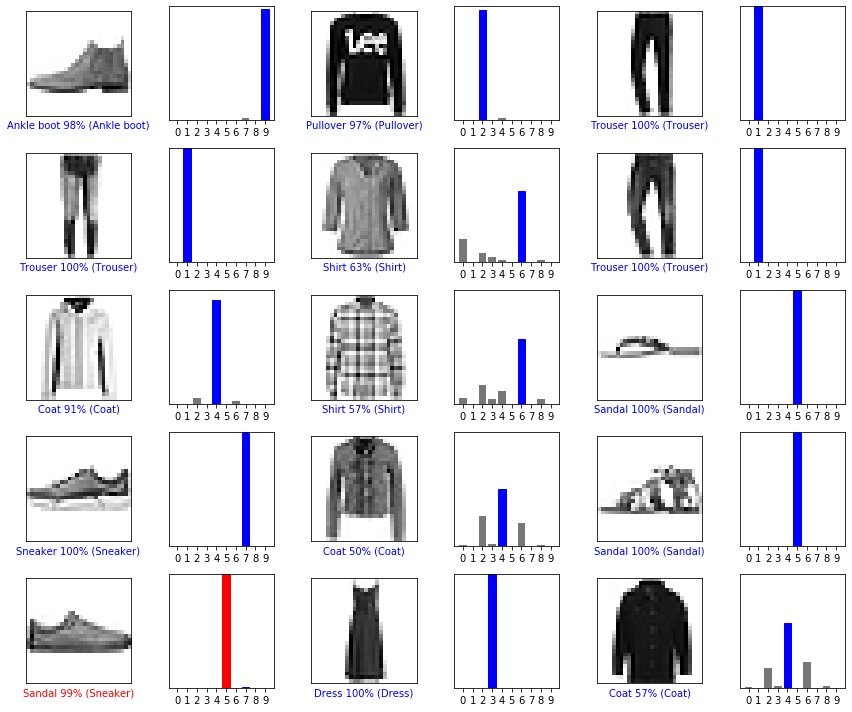

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [64]:
#optional, save ENTIRE model (not just the weights) - meaning can be run without any original code
#model.save('custommodelname.h5') #saves in local directory

In [63]:
#load a saved, ENTIRE model
#new_model = tf.keras.models.load_model('custommodelname.h5')
#new_model.summary()

[[3.7871124e-03 7.9352430e-06 9.7128505e-01 4.4980430e-04 1.7753573e-02
  9.7079706e-14 6.7050848e-03 0.0000000e+00 1.1607892e-05 1.5183011e-31]]


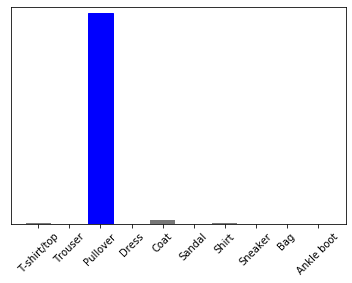

In [84]:
#make single prediction
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


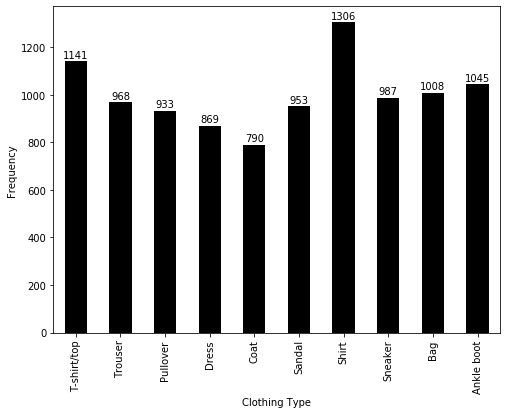

In [157]:
#frequency chart of all predictions
predictions_results = []
for i in range(len(predictions)):
    predictions_results.append(np.argmax(predictions[i]))
    
predictions_results_freq = np.unique(predictions_results, return_counts=True) #array of result frequeny 


plt.figure(figsize=(8, 6))
ax = pd.Series(predictions_results_freq[1]).plot(kind='bar', color='black') #raw, data values
ax.set_xlabel('Clothing Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(class_names)

labels = predictions_results_freq[1] #raw data values to be used as chart labels
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')